___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
__


# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas. There is another notebook: *Advanced Recommender Systems with Python*. That notebook goes into more detail with the same data set.

For more topics in recommender systems and math behind them, read "Recommender Systems" by Jannach and Zanker

## 2 Most Common Recommender Systems

### Content-Based
Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them 
- Similarity between the items 

Content based can be similarity amongst users (same age spotify listeners, or students that have bought the same textbook might also enjoy other similar ones)
- if we don't know anything about users, we can use collaborative filtering 


### Collaborative Filtering (CF)
Collaborative filtering produces recommendations based on the knowledge of the users' attitude to items, it uses "wisdom of the crowd" to recommend items
- Based off of user preferences 
- More commonly used compared to content-based because it usually gives better results and is relatively easy to understand (from an implementation perspective)
    - Algorithm can do feature learning on its own, which means that it can start to learn for itself what features to use 
        - Start learn for itself, what features to use when recommending items
- Ex: Amazon's suggestions of items to you based off of other people's shopping experiences

Cons: 
- CF does not perform well when dataset is sparse (a lot of blank cells)
    - can count the sparsity of the matrix (count # of ratings we have, and divide by # of cells in the matrix)
    - if sparsity is less than 0.5, CF might not be best option 

Step 1: start by transforming the dataset into a user by item utility matrix 
- Ex: recommending movies have the movie title, the users, and their rating (row = user, column = movie, populated cells = ratings)
    - typically a `scipy.sparse.csr_matrix` and the matrix will have empty cells (these are not 0's but they are just cells with no values since not every user has reviewed/watched every movie 
        - the matrix can be vary big, and be very sparse (a lot of blank cells)
        
Step 2: normalize the data (data pre-processing)
- users can be overly bias (negative - pessimists or positive - optimists) on reviewing movies
    - can account for this bias for mean normalization (user-item rating bias (b sub-ui) = global average (mu) + item's average rating (b sub-i) + user's average rating (b sub-u))
        - then subtract item's average rating from the user's rating for given item "i"
        
Step 3: pick a model
- matrix factorization - factorize the user-item matrix and factorize it to get 2 latent factor matrices:
    - user-factor matrix
    - item-factor matrix
- latent factors are represented by "K" and can be thought as the latent features that underly the interactions between users and items
    - we don't know what each latent feature represents... one latent feature might represent who likes scary movies from the 90s, and another can be somebody who likes anime 
    - once we have 2 latent factor matrices, we can reconstruct the user-item matrix by taking the inner product of these 2 factor matrices and this reconstructed matrix will populate empty/blank cells in our original matrix and so population of these cells can be thought of as our **predicted ratings**
- missing ratings are predicted from the inner product of these two factor matrices

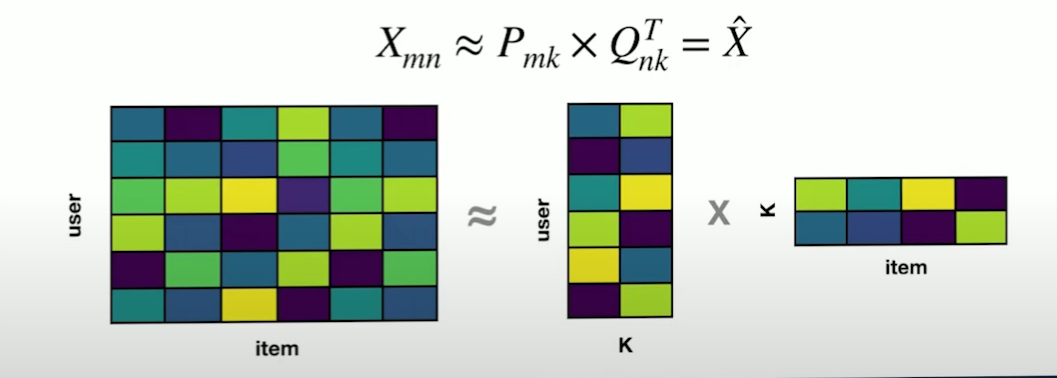


Matrix factorization has a few different algorithms: 
- Alternating Least Squares (ALS)
- Stochastic Gradient Descent (SGD)
- Singular Value Decomposition (SVD)

Step 4: pick evaluation metric
- popular evaluation metric for recommender systems is "Precision at K" - which takes a look at the top "K" recommendations and calculate which of these recommendations was actually relevant to the user
    - for this example, we'll choose (arbitrarily) top 10 recommendations (and which are relevant to the user) using alternating least squares
    
Step 5: tune hyperparameter (what is one?)
- changing configuration can change output of the model and it's an external property of the model 
- we will try all the combinations of these and find out which will give us the best result (Precision @ 10)

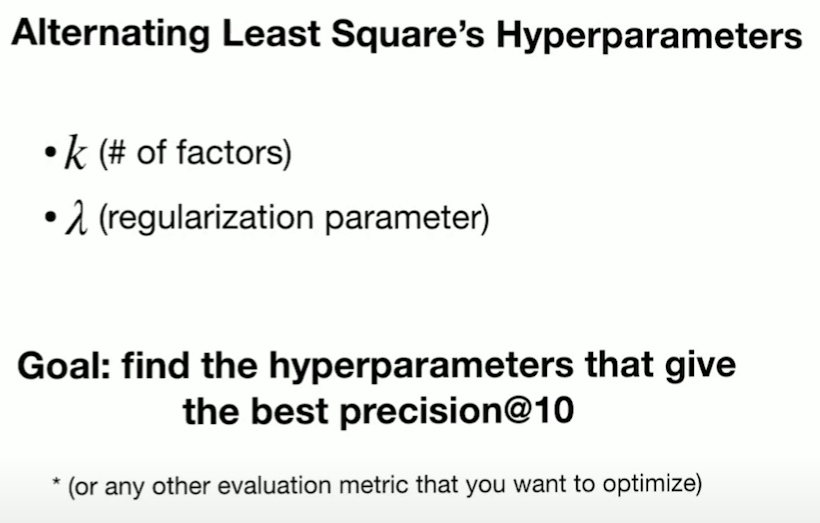

- we can use grid search which iterates over a set of combinations of "K" and "lambda" 
    - we run the model and evaluate it for each combination of "lambda" and "K"
        - ex: if we evaluate 3 different values of "K" and "lambda", we will need to run our model 9 times, evaluate it 9 times and see which of the 9 models gives the best evaluation at 10
- we can use random search which randomly selects values of "K" and "lambda" and evaluates this several times
    - this doesn't SEEM that good to grid search because it's less exhaustive (proven by research of University of Montreal), but this is actually much more effective in addition to being less exhaustive 
- we can also use sequential model-based optimization
    - smarter way of tuning hyperparameters because it takes into consideration previous iterations when you sample in current iteration
        - ex: "scikit-optimize (skopt)" or "hyperopt" or "Metric Optimization Engine (MOE developed by Yelp)"

Step 6: model training 

let's say hypothetically, "K" = 8 and "lambda" regularization = 0.001 is the best precision at K...

we can train our models with optimal hyperparameters to generate recommendations

Step 7: post-processing

we have to sort all the predicted ratings to get the top recommendations to render to the user and may want to filter out items that the user has interacted with (for example: if watched the movie already)

not really related to post-processing: we can generate item/item-recommendations with current infrastructure (trained ALS model, we can apply similarity metrics a.k.a. `cosine similarity` to get similar movies per given movie ("because you watched X, you may like Y")

Step 8: evaluation 

best way to evaluate any recommender is to actually test it in the wild (AB testing, usability testing, feedback from real users, but in many cases, that's not possible) 

offline evaluation:
- in traditional ML, we split training and testing set (this doesn't work with recommender models because the model won't work if you train all on separate data that is separate from the user population)
- in recommendation, we mask random interactions in our matrix and use this as our training set (so we can pretend we don't know a user's rating in a movie but we actually do- then we compare the predicted rating with actual rating) 
    - this is how we calculate precision @ 10

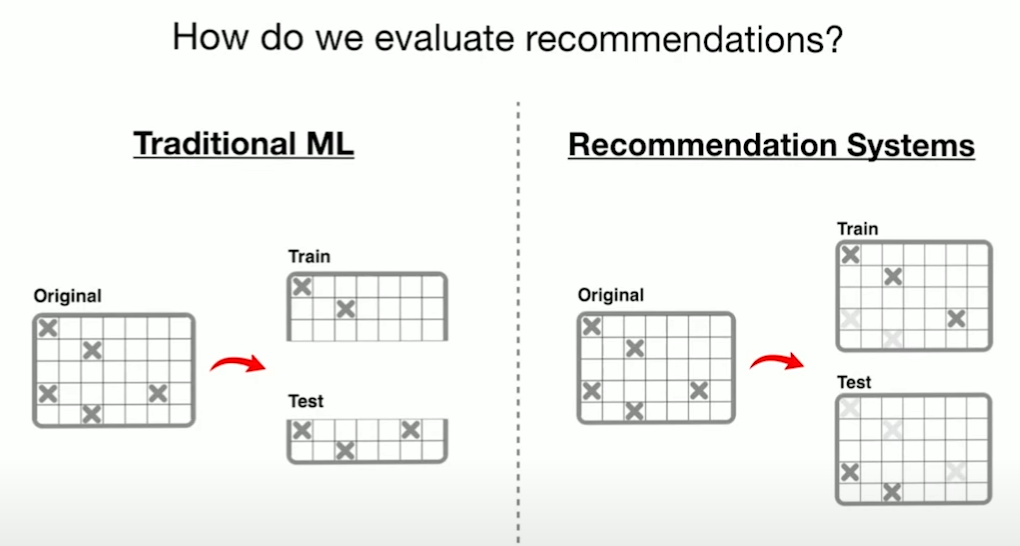
                                             
there are other metrics out there as well (like RMSE, recall, etc.)
- precision and recall are popular in recommenders because they're information retrieval metrics 
    - precision minimizes # of false-positives
        - when there's a recommendation that surfaced in the top 10 but they were not a good recommendation
    - recall minimizes # of false-negatives
        - when there is a good recommendation movie but didn't make it to the top 10 

important considerations:
- interpretability
    - can build a complex NN that gives us really precise results but it'll be difficult to interpret these results
- efficiency and scalability
    - runtime might be slow so not scalable for large datasets 
- diversity
- serendipity 

Python packages 
`import surprise` (@NicolasHug)
`import implicit` (@benfred)
`import LightFM` (@lyst)
`import pyspark.mlib.recommendation` 



### Memory-Based Collaborative Filtering
Model-based uses Singular Value Decomposition (SVD)
- SVD is a matrix factorization technique used to predict unknown preferences or ratings in a user-item rating matrix, it helps identify latent factors associated with users and items to make predictions/recommendations
- in typical recommenders, you have a sparse matrix where users are 1 axis (row), and items (like movies, products, etc.) are on another (column)

##### How does it work? 

Matrix Factorization: SVD decomposes the original sparse user-item matrix into three smaller matrices: U, Σ, and V^T (where T denotes the transpose)
- U (User matrix): Represents the relationship between users and latent factors. Each row corresponds to a user, and each column corresponds to a latent feature.
- Σ (Sigma matrix): A diagonal matrix containing singular values. These values represent the strength or importance of each latent feature.
- V^T (Item matrix): Represents the relationship between items and latent factors. Each column corresponds to an item, and each row corresponds to a latent feature.

Dimensionality Reduction: By keeping only the top 'k' singular values (and corresponding columns of U and rows of V^T), SVD reduces the dimensionality of the problem, capturing the most significant underlying structures of the data. This process is known as **Truncated SVD**.

Prediction and Recommendation: The approximated matrices from the SVD can be used to reconstruct the original ratings matrix, but now it also fills in the missing entries with estimated ratings. These estimated ratings can then be used to recommend items to users based on items they haven’t rated yet.

##### How to use this in recommenders?
1. Rating Prediction: Estimate how a user would rate items they haven't interacted with, allowing for personalized recommendations.
2. Dimensionality Reduction: Identify underlying latent factors (like genres in movies or general product categories) that might not be explicitly labeled in the data.
3. Handling Sparse Data: Most user-item matrices are sparse because not all users rate all items. SVD helps in dealing with this sparsity by filling in missing values with predicted ratings.


##### Considerations
- Data Sparsity and Overfitting: Regularization techniques might be necessary to handle very sparse matrices and prevent overfitting, especially when the number of latent factors increases.
- Scalability: For very large datasets, computing SVD can be computationally expensive. Techniques such as stochastic gradient descent or alternative matrix factorization methods might be used for scalability.
- Cold Start Problem: SVD and other matrix factorization methods struggle with new users or new items that have no ratings (the cold start problem). Complementary techniques may be needed to handle these cases.


### Model-Based Collaborative Filtering
Memory-based uses Computing Cosine Similarity

Computing cosine similarity in recommenders is a method used to measure how similar two users or two items are with respect to their interests, based on the ratings or interactions they have expressed. This similarity metric is widely used for collaborative filtering, a type of recommendation approach that suggests items to users based on the preferences of similar users or the characteristics of similar items.

##### How does it work?

The cosine similarity between two vectors (in the context of recommender systems, these vectors could represent user ratings across items or item ratings across users) is calculated by taking the dot product of the two vectors and then dividing by the product of their magnitudes (Euclidean norms). The formula for cosine similarity between two vectors A and B is:

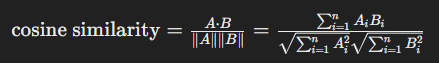

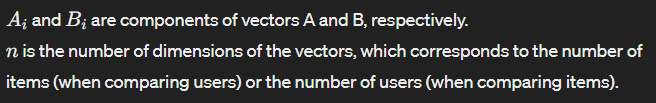

##### How to use in recommender systems?
User-Based Collaborative Filtering:
1. Calculate the cosine similarity between all pairs of users.
2. Identify the most similar users to a given user (neighbors).
3. Predict the ratings of items for the user based on the ratings of these neighbors, usually by taking some form of weighted average.

Item-Based Collaborative Filtering:
1. Compute the cosine similarity between all pairs of items.
2. For a given item, find the most similar items (again, neighbors).
3. Predict the rating a user would give to an item based on how they have rated similar items.

##### Pros 
- Normalization: Unlike other metrics, cosine similarity considers the angle between two vectors, not the magnitude. This means that it normalizes for user bias in rating scales (e.g., some users might tend to give higher ratings overall).
- Sparsity: It works reasonably well even with sparse data, a common scenario in many recommender systems where users have only rated a small subset of all available items.
- Performance: Generally efficient to compute, especially with optimizations and considering only the subset of items or users with non-zero entries.

##### Cons
- Sparsity: Despite its efficiency with sparse data, extreme sparsity can still degrade the quality of recommendations, as there may be insufficient data to establish meaningful similarities.
- Cold Start: Like other collaborative filtering methods, cosine similarity struggles with the cold start problem for new users or items with no or few ratings.
- Over-Specialization: Recommendations based solely on cosine similarity may lead to over-specialization, where the system continually recommends items very similar to those the user has already rated, potentially reducing the diversity of the recommendations.

# Single Value Decomposition 

Matrix decomposition in numerical linear algebra 
- Search method
- Data reduction tool (high-dimensional data, and SVD reduces it into the key features for analyzes this data)
    - data driven generalization of the fourier transform (FFT) 
        - FFT is one of the most useful transformations in all of mathematics based on sine and cosine functions to approximate functions 
- tailored to the specific problem (features in common with FFT) 
- solve linear systems of equations for non-square A-matrices (Solve Ax = b) 
    - particular for linear regression models 
        - least squares linear regression is built off of SVD 
    - can use this as the basis for Principal Component Analysis
        - take high dimensional data and distill it into the key features for correlation 
- used in recommender systems like Google Search, facial recognition from human faces, correlation patterns of what types of people like what types of movies 
- based on simple and interpretable linear algebra 
    - use it on any data matrix and get interpretable features to build models on (scalable, can apply to large datasets) 

## Compute the SVD 

https://www.youtube.com/watch?v=nbBvuuNVfco&ab_channel=SteveBrunton

- take a data matrix "X" and decompose it or represent it as the product of three other matrices (U * Big Sigma * Transpose (V^T))

- "U"-matrix (left-singular vectors)
    - unitary matrix (orthogonal)
    - "n" by "n" matrix 
    - they have the same shape as the column of the data matrix "X" 
        - if columns of data matrix "X" is (for example) 1 million by 1 vectors, then the columns of "U"-matrix will be 1 million by 1 vectors 
    - if data matrix "X" was a dataset of pictures of faces, "u1", "u2", ... , .etc are our "eigen"-faces where they are hierarchically arranged so u1 is more important than u2 in terms of their ability to describe the variance in the columns of "X"
        - give basis where I can represent each column of the original data matrix "X"
    - `U-transpose U` == `UU-transpose` == `Identity`(n by n)
        - orthonormal/unit length, complete basis for all of our "n" for this n-dimensional subpsace or n-dimensional vector space where the columns of my data live 
        
- Sigma is a diagonal matrix (matrix of singular values)
    - because there are only "m" columns of data matrix "X", there will be only "M" nonzero singular values and everything else below will be "0" 
    - non-negative, hierarchically order (in decreasing magnitude) - ordered by importance 
        - sigma1 >= sigma2 >= sigma3 >= ... sigma m >= 0
        - what this means, the first column of "U" corresponding the sigma1 and the first column of "V" corresponding to sigma1 is more important than the second columns corresponding with sigma2, more important than the 3rd column in describing the data-matrix "X" 
            - the corresponding importance is given by the corresponding singular value 
            
- "V"-matrix (right-singular vectors)
    - unitary matrix (orthogonal)
    - transposed matrix 
    - like "U", `V-transpose V` == `VV-transpose` == `Identity` (n by m)
    - v1, v2, ... vm (these act like eigen time-series in the case of physics)
        - in the example of pictures of human faces, take V-transpose (first column of V-transpose matrix will tell us the mixture of all of the eigen-facees, the exact mixture of all of the columns of "u" and add them to make "X1"- column

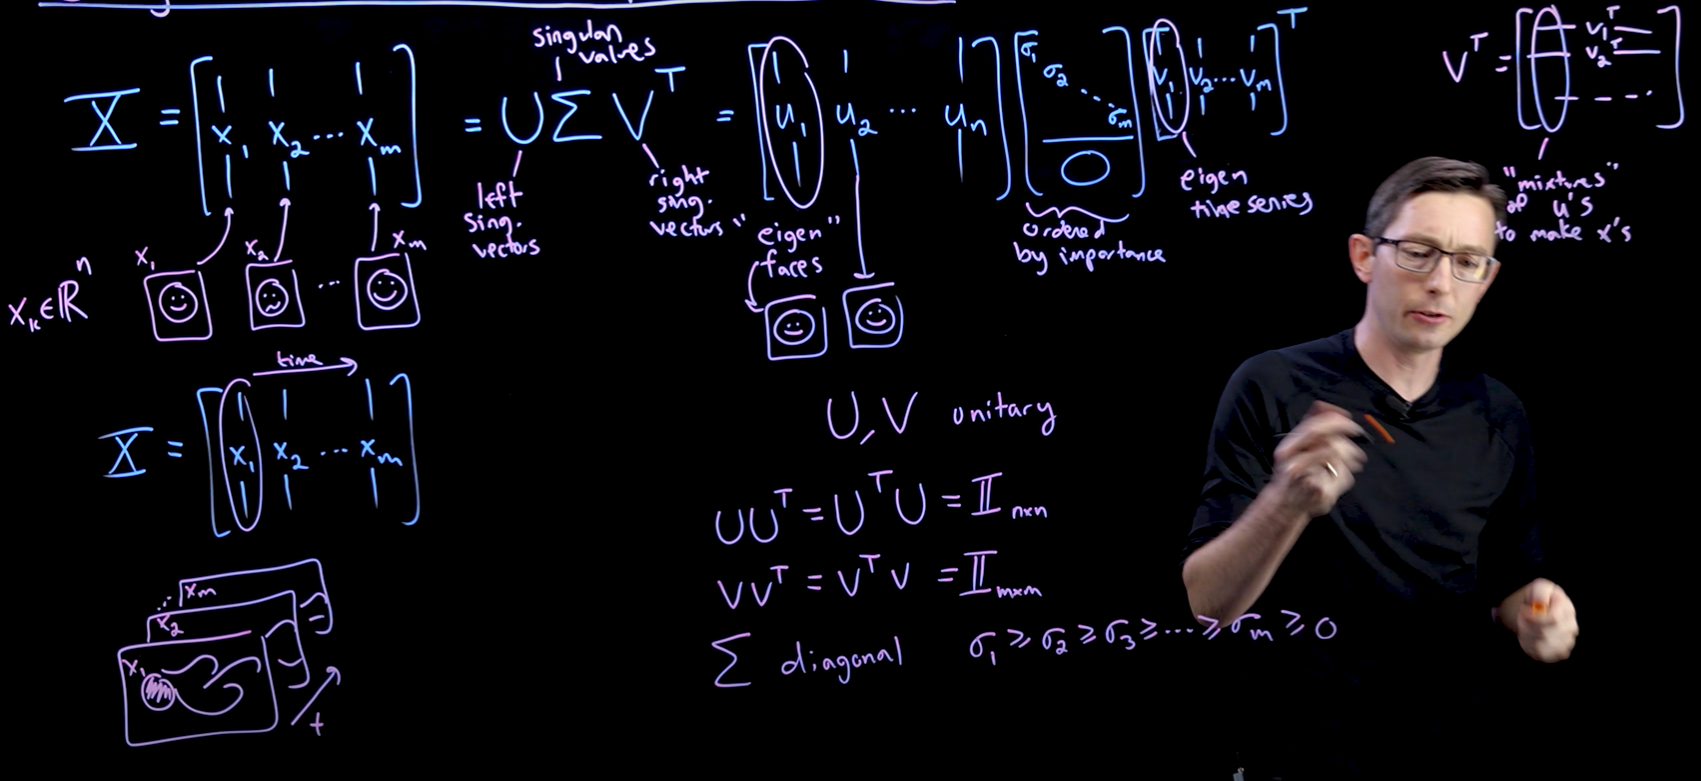

**It is guaranteed to exist, and it is unique**

# Alternating Least Squares (ALS)

Used in collaborative filtering in recommender systems, particularly for matrix factorization models with the goal to predict unkown entries in a user-item interaction matrix
- it alternates between fixing one set of variables while optimizing for another, hence the name "alternating" 

Works well with sparse matrices for recommendation systems
- the blank cells end up being predicted values of which users may or may not like a movie 
- predictions that end up being the highest values become recommendations for the users 


### ALS methodology 

R(m * n) = U(m * k) * P(k * n)
- ALS will take "R"-matrix and factor it into two smaller matrices "U" and "P" where if multiplied back together, it produces an approximation of the original matrix "R"
- matrix "R" has the size of m * n where **"m" is the number of users**, and **"n" is the number of items**
- the goal of matrix factorization is to find 2 lower-dimensional matrices: "U" (size m * k) and "P" (size of n * k) and
    - the "k" is the number of latent factors, and it's much smaller than "m" or "n" 
    - the matrix "U" represents the user factors while "P" represents the item factors 

- this will have an error term: 
    
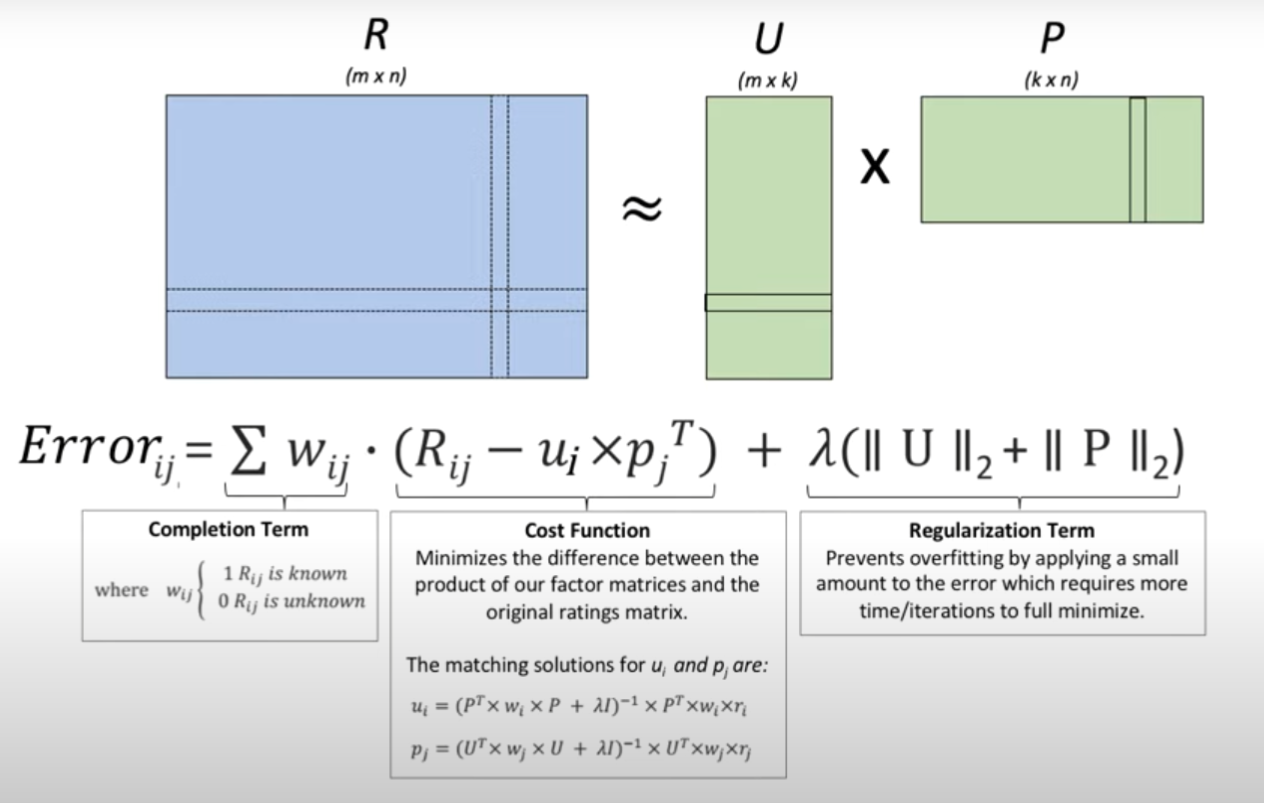

- R sub-ij represents the rating of the i-th user for the j-th item
    - this will make the matrix sparse since not all users rate the item (explaining the blank cells above)

1. The way that ALS determines what values to put into "U" and "P" is to first fill them out with random 
2. Fix "U" and solve for "P"
    - for each item, solve a least squares problem to find the best-fitting item factors
        - for each item j, you're optimizing its factor vector P sub-j, to best fit all the users' ratings for that item based on the current user factors 
3. Fix "P" and solve for "U"
    - treat item factors "P" as fixed
    - for each user, solve a least squares problem to find the best-fitting user factors (optimizing each user P's factor vector U sub-i, to best fit all the items they have rated, given the current item factors
4. Rinse and repeat (iterate the alternating optimization steps until the approximation error (i.e. difference between the observed ratings and the ratings predicted by the current factors) stops decreasing significantly or a maximum number of iterations is reached
5. Regularization 
    - prevent overfitting, when data is sparse, ALS often incorporates regularization
    - when solving for U and P, the algorithm also tries to keep these factor matrices from having too large of values, balancing fitting the existing ratings against the complexity of the user and item factors 



# Build Recommender System

Build a recommender system for item-similarity based recommendation system for movies

In [1]:
import numpy as np
import pandas as pd

## Get the Data

For our content-based recommender system

In [2]:
columns_name = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=columns_name)

In [3]:
df.head(3)

# the MovieLens dataset
# "item_id" is the movie
# "rating" is what was given to the movie
# "timestamp" is when they gave the movie that rating

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


Now let's get the movie titles:

In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head(5)

# there is correlation between "item_id" and "title"
# we need to merge the dataframes 

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We can merge them together:

In [5]:
df = pd.merge(df,movie_titles, on='item_id')
df.head(5)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis (EDA)

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [7]:
df.groupby('title')['rating'].mean()

# group by the title, and grab the rating column, and average it
# this is mean rating by the title:

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

# this is movies with the best rating (descending means best to worst)

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

# which titles of the movies have the most ratings:

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings_df = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_df.head()

# we have an index based off of the movie title and a rating column with average rating
# rating depends on how many people saw it, one 5-star review does nothing 

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings_df['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

ratings_df.head(5)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now a few histograms:

<AxesSubplot:>

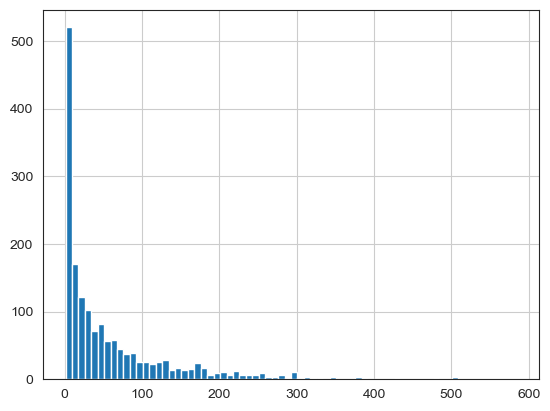

In [14]:
ratings_df['num of ratings'].hist(bins=70)

It seems like most of our movies have 0 or 1 rating, which makes sense since not many people rewatch movies and people only really watch famous or the blockbuster/big hit hollywood movies

<AxesSubplot:>

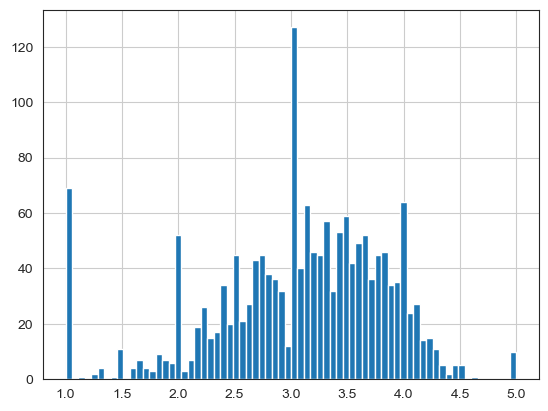

In [16]:
ratings_df['rating'].hist(bins=70)

We see a peak at 1.0, 2.0, 3.0, 4.0 because people tend to give whole-number reviews.

The movie ratings are somewhat normally distributed. There's an outlier of 1-star movies which makes sense because there's a probably a bunch of bad movies where only a few people watched it and gave it a negative review. 

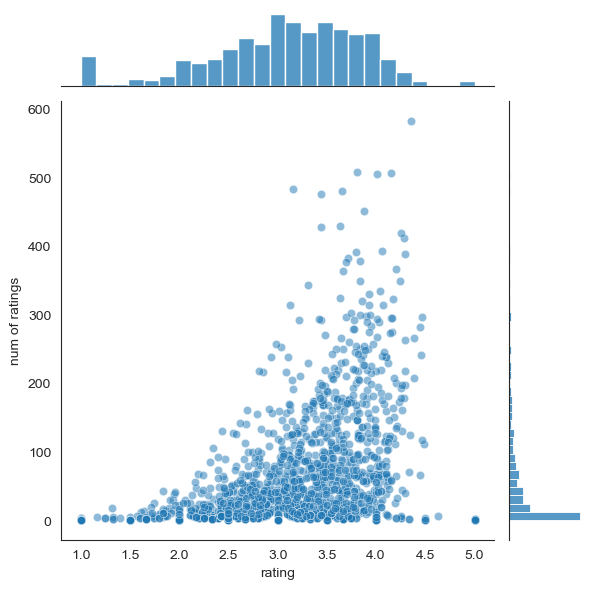

In [17]:
# we might be interested in the distribution or relationship between the average rating and number of ratings 
# we can do this with a jointplot

sns.jointplot(x='rating',y='num of ratings',data=ratings_df,alpha=0.5)

Seems like as you get more ratings, you're more likely to have a higher rating of a movie which makes sense because if your movie is good, you'll have more people watch it and as more people watch it, more people will spread word of mouth that it's good. 

## Simple Recommendation System Based Off of Item Similarity (Recommending Similar Movies)

Now let's create a matrix that has the `user_id` on one access and the movie `title` on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [18]:
df.head(5)

# we only care about title, user_id, and rating

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [20]:
# use pivot table to get this into matrix form

moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

moviemat.head(5)

# we have a lot of missing values because most people haven't seen most of the movies 

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

In [21]:
ratings_df.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: "Starwars" and "Liar Liar"

Now let's grab the user ratings for those two movies:

In [22]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

# we have a series of the user_id, the rating they gave the movie, or NaN if they didn't rate the movie

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

We can then use `corrwith()` method to get correlations between two pandas series:

- `corrwith()` will compute the pairwise correlation between rows and columns of two DataFrame objects (insted of index or columns of a dataframe)

In [23]:
moviemat.corrwith(starwars_user_ratings)

# we get a bunch of titles of movies and their correlations with star wars ratings

C:\Users\raiu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\raiu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [24]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\raiu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\raiu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\raiu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\raiu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [25]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])

corr_starwars.dropna(inplace=True)
corr_starwars.head()

# we just created a dataframe where the index is the title of the movie, correlation column tells us how correlated this movie's
# user ratings were to the user ratings of the star wars movie 

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [26]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

# we get a bunch of titles with perfect correlation - which doesn't really make sense because these movies are unrelated to star
# wars, but it probably is just that these movies have 1 rating by somebody that rated it 5 stars that also happen to rate star
# wars as 5 stars 

# we can filter this out by setting a threshold where movies have to have a certain number of reviews/ratings before they are 
# considered in the model

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


<AxesSubplot:>

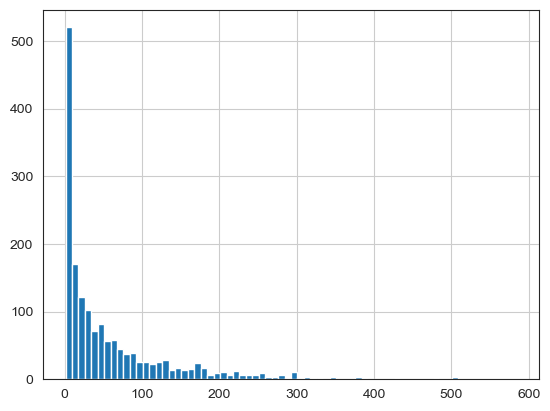

In [27]:
# we can look at our histogram and we see that we get a decent decline after 100 so maybe that is where we should set threshold

ratings_df['num of ratings'].hist(bins=70)

Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [28]:
corr_starwars = corr_starwars.join(ratings_df['num of ratings'])
corr_starwars.head()

# the reason why we use ".join" instead of ".merge" is because we have the title as the index for the dataframe

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [29]:
# filter out movies that don't have 100 ratings

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [33]:
# as a result, we see star wars is a 100% fit to star wars, but the Empire Strikes Back is also a good fit (this makes sense 
# because it's a sequel of the star wars movie)

# raiders of the lost ark is an indiana jones movie which has a similar genre/theme to star wars 

# but you see there's a big drop between austin powers and indiana jones because austin powers is a comedy and you may or may 
# not enjoy it if you like star wars

Now the same for the comedy Liar Liar:

In [34]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings_df['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>50].sort_values('Correlation',ascending=False).head()

# i set the reviews to be over 50 because 100 seems a lot of reivews

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Casper (1995),0.538816,52
Batman & Robin (1997),0.532858,62
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
